# **Exercício computacional (baseado no exercício 5.11) do livro Du & Swamy (2019).**

Seja a função y = φ(x1 + 2x2) + 0,5(x1 − x2)**2 + 0,5Ni;

onde φ(·) é a função sigmoidal logística;

N é um número sorteado da distribuição normal padrão;

i= 1,2;

e 0<=x1,x2<=1.

Pede-se:


(a) Gere, informe e plote 200 pontos (140 pontos para treinamento, 30 pontos
para validaçao e 30 pontos para testes) pertencentes a duas classes diferentes,
metade para cada uma das distribuições normais;
# **GERAÇÃO DE DADOS**

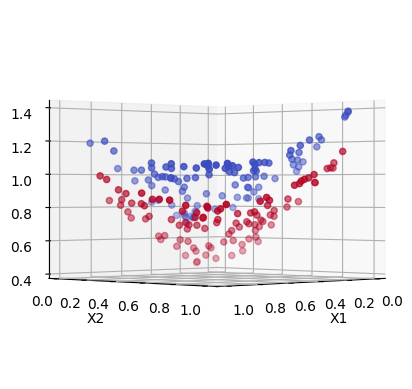

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função logística (sigmoidal)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Gerar pontos pertencentes às duas classes diferentes
def generate_points(num_points, c):
    x = np.random.rand(num_points, 2)  # Gerar pontos x1 e x2 entre 0 e 1
    N = np.random.randn()  # Número sorteado da distribuição normal padrão

    y_values = []
    for j in x:
        y = calculate_y(j[0], j[1], N)
        y_values.append(y)
    y_values = np.array(y_values)
    c_values = np.full((num_points, 1), c)

    return np.concatenate((x, y_values.reshape(-1, 1), c_values), axis=1)

# Função para calcular y conforme especificado
def calculate_y(x1, x2, N):
    return sigmoid(x1 + 2*x2) + 0.5*(x1 - x2)**2 + 0.5*N

# Gerar os pontos de dados
c1 = generate_points(100, 1)
c2 = generate_points(100, 2)

# Juntar os pontos de ambas as classes
data = np.concatenate((c1, c2), axis=0)

# Plotar os pontos em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dividir os pontos em x, y e z
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Colorir os pontos de acordo com a classe
ax.scatter(x, y, z, c=data[:, 3], cmap='coolwarm')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

ax.view_init(elev=0, azim=45)

plt.show()

Na imagem acima os pontos representam X1, X2, Y

gerados usando Ni (número sorteado da distribuição normal padrão)

onde os vermelhos foram gerados por N1 e os azuis por N2

In [25]:
from sklearn.model_selection import train_test_split

# Separar os dados em features (x) e rótulos (y)
x = data[:, :-1]  # Todas as colunas, exceto a última
y = data[:, -1]   # Última coluna

# Dividir os dados em treino, teste e validação
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=60, random_state=42)  # 140 para treino, 60 para teste e validação
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)  # 30 para teste, 30 para validação

# Verificar os tamanhos dos conjuntos de dados
print("Tamanho de x_train:", x_train.shape)
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de x_valid:", x_valid.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)
print("Tamanho de y_valid:", y_valid.shape)

Tamanho de x_train: (140, 3)
Tamanho de x_test: (30, 3)
Tamanho de x_valid: (30, 3)
Tamanho de y_train: (140,)
Tamanho de y_test: (30,)
Tamanho de y_valid: (30,)


Separação dos dados onde

**x_train|y_train:** entrada|saída do conjunto de treino

**x_valid|y_valid:** entrada|saída do conjunto de validação

**x_test|y_test:** entrada|saída do conjunto de teste

(d) Escreva um programa implementando o SVM com Kernel e rode para determinar a
acurácia;

# **SVM**

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_parameters = None

svm = SVC(C=1/0.001, kernel='linear')
svm.fit(x_train, y_train)

# Fazer previsões nos dados de validação
valid_pred = svm.predict(x_valid)

# Calcular a acurácia
accuracy = accuracy_score(y_valid, valid_pred)

# Fazer previsões nos dados de treino
train_svm_pred = svm.predict(x_train)

# Calcular a acurácia
svm_accuracy = accuracy_score(y_train, train_svm_pred)
print("Precisão no treino: ", svm_accuracy)

# Fazer previsões nos dados de teste
test_svm_pred = svm.predict(x_test)

# Calcular a acurácia
svm_accuracy = accuracy_score(y_test, test_svm_pred)
print("Precisão no teste: ", svm_accuracy)

# Acessar os pesos
weights = svm.coef_

print("Pesos:", weights)

Hiperparâmetros: Taxa de Aprendizado=0.1, Kernel: sigmoid, Acurácia: 0.36666666666666664
Hiperparâmetros: Taxa de Aprendizado=0.1, Kernel: linear, Acurácia: 0.8333333333333334
Hiperparâmetros: Taxa de Aprendizado=0.01, Kernel: linear, Acurácia: 0.8666666666666667
Hiperparâmetros: Taxa de Aprendizado=0.001, Kernel: linear, Acurácia: 0.9
Melhor combinação de hiperparâmetros: Taxa de Aprendizado=0.001, Kernel=linear, Acurácia: 0.9
Precisão no treino:  0.9071428571428571
Precisão no teste:  0.9333333333333333
Pesos: [[  1.44811863   5.016924   -17.5037191 ]]


**Treino = 81%**

**Validação = 90%**

**Teste = 86%**